# Classification
---
Author: Anatoliy Durkin

Updated: 28.02.2025

В данном ноутбуке библиотеки будут импортироваться по мере необходимости, что продиктовано удобством для процесса обучения. Однако напоминаю, что лучше, если все импорты у вас находятся в одной ячейке!

In [1]:
import pandas as pd

## Данные

Набор данных по диагностике диабета.

Этот набор данных содержит 9538 медицинских записей , связанных с диагностикой диабета и факторами риска. Он включает различные параметры здоровья, привычки образа жизни и генетические предрасположенности, которые способствуют риску диабета. Данные структурированы с реалистичными распределениями, что делает их ценными для медицинских исследований, статистического анализа и приложений машинного обучения.

---
Описание столбцов:

- Age: The age of the individual (18-90 years).
- Pregnancies: Number of times the patient has been pregnant.
- BMI (Body Mass Index): A measure of body fat based on height and weight (kg/m²).
- Glucose: Blood glucose concentration (mg/dL), a key diabetes indicator.
- BloodPressure: Systolic blood pressure (mmHg), higher levels may indicate hypertension.
- HbA1c: Hemoglobin A1c level (%), representing average blood sugar over months.
- LDL (Low-Density Lipoprotein): "Bad" cholesterol level (mg/dL).
- HDL (High-Density Lipoprotein): "Good" cholesterol level (mg/dL).
- Triglycerides: Fat levels in the blood (mg/dL), high values increase diabetes risk.
- WaistCircumference: Waist measurement (cm), an indicator of central obesity.
- HipCircumference: Hip measurement (cm), used to calculate WHR.
- WHR (Waist-to-Hip Ratio): Waist circumference divided by hip circumference.
- FamilyHistory: Indicates if the individual has a family history of diabetes (1 = Yes, 0 = No).
- DietType: Dietary habits (0 = Unbalanced, 1 = Balanced, 2 = Vegan/Vegetarian).
- Hypertension: Presence of high blood pressure (1 = Yes, 0 = No).
- MedicationUse: Indicates if the individual is taking medication (1 = Yes, 0 = No).
- Outcome: Diabetes diagnosis result (1 = Diabetes, 0 = No Diabetes).

---
Этот набор данных полезен для изучения взаимосвязей между образом жизни, генетическими факторами и риском развития диабета, предоставляя ценную информацию для прогностического моделирования и аналитики здоровья.

In [3]:
df = pd.read_csv('diabetes_dataset.csv')

Ознакомьтесь с данными, проверьте их на наличие ошибок, пропусков и прочих вещей, которые могут осложнить дальнейшую работу. Ознакомьтесь с типами данных в таблице.

In [76]:
# Ваш код
...

Необходимо ли выполнить какую-то предобработку? Сделайте всё, что считаете нужным, всё может сказаться в дальнейшем при построении моделей.

In [77]:
# Ваш код
...

## Выборка данных

В разделении данных помогает замечательна функция `train_test_split` из библиотеки `scikit-learn`. Именно этой библиотекой мы в основном будем пользоваться в дальнейшем. Напоминаю, если у вас нет библиотеки, её легко установить через `pip` даже из ячейки ноутбука.

In [ ]:
# Если нужно установить библиотеку:

# !pip install scikit-learn

In [7]:
from sklearn.model_selection import train_test_split

Теперь можем использовать эту функцию для разделения данных. Функция принимает на вход два набора данных (пожаем один с признаками, другой с целевым признаком), аргумент `test_size` позволяет указать долю данных, которую нужно отделить в тестовый набор. Функция автоматически случаным образом разделит датасеты в указанном соотношении, при этом в тестовую часть попадут соответствующие строки из обоих наборов данных.

Также указывается аргумент `random_state`, он не обязателен, но рекомендуется его указывать. Это фиксация сида для генерации рандомных чисел. Таким образом, указывая одно и то же число в этом аргументе, вы получите одно и то же разбиение на выборки. Этот аргумент позволяет сделать ваши манипуляции воспроизводимыми.

Функция возвращает четыре датасета, по два для каждого из переданных, при этом в каждой паре сначала идет обучающая выборка, затем тестовая. Обратите внимание, как мы сохраняем резульатат. Здесь "x" - признаки, "y" - целевой признак.

In [16]:
x_train, x_test, y_train, y_test = train_test_split(df.drop(['Outcome'], axis=1), df['Outcome'], test_size=0.25, random_state=42)

Сравните размеры датасетов, убедитесь, что в тестовой выборке нужное нам количество данных. Сравните индексы датасетов с признаками и целевым признаком, чтобы убедиться, что они совпадают.

In [80]:
# Ваш код
...

## kNN

In [19]:
from sklearn.neighbors import KNeighborsClassifier

In [23]:
knn = KNeighborsClassifier(n_neighbors=10)

In [24]:
knn_model = knn.fit(x_train, y_train)

In [26]:
knn_predictions = knn.predict(x_test.values)
knn_predictions

C:\Users\anato\anaconda3\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [27]:
from sklearn.metrics import accuracy_score

In [28]:
accuracy = accuracy_score(y_test, knn_predictions)
print(f'Accuracy: {accuracy}')

Accuracy: 0.6737945492662474


Матрица ошибок

---
|           | Predicted: 0 | Predicted:1 |
|-----------|:------------:|:-----------:|
| Actual: 0 | TN           | FP          |
| Actual: 1 | FN           | TP          |

In [35]:
from sklearn.metrics import confusion_matrix

In [36]:
confusion_matrix(y_test, knn_predictions)

array([[1480,  102],
       [ 676,  127]], dtype=int64)

Матрица ошибок хороша, но можно ли сделать её легче для восприятия? Попробуйте сделать тепловую карту.

In [81]:
# Ваш код
...

Продолжим изучение метрик. Что мы можем получить ещё из матрицы ошибок? Два важных показателя.

---

$Precision = \frac{TP}{TP+FP}$

Точность определяет, как много отрицательных ответов нашла модель, пока искала положительные. Чем больше отрицательных, тем ниже точность.

---

$Recall = \frac{TP}{TP+FN}$

Полнота выявляет, какую долю положительных среди всех ответов выделила модель. Обычно они на вес золота, и важно понимать, как хорошо модель их находит.

In [31]:
from sklearn.metrics import precision_score, recall_score, f1_score

In [32]:
precision = precision_score(y_test, knn_predictions)
recall = recall_score(y_test, knn_predictions)
print(f'Precision: {precision}')
print(f'Recall: {recall}')

Precision: 0.5545851528384279
Recall: 0.1581569115815691


F1-мера - среднее гармоническое точности и полноты.

In [33]:
f1 = f1_score(y_test, knn_predictions)
print(f'F1: {f1}')

F1: 0.24612403100775196


C:\Users\anato\AppData\Local\Temp\ipykernel_40908\1478937934.py:9: RuntimeWarning: invalid value encountered in divide
  z = 2*X*Y/(X+Y)


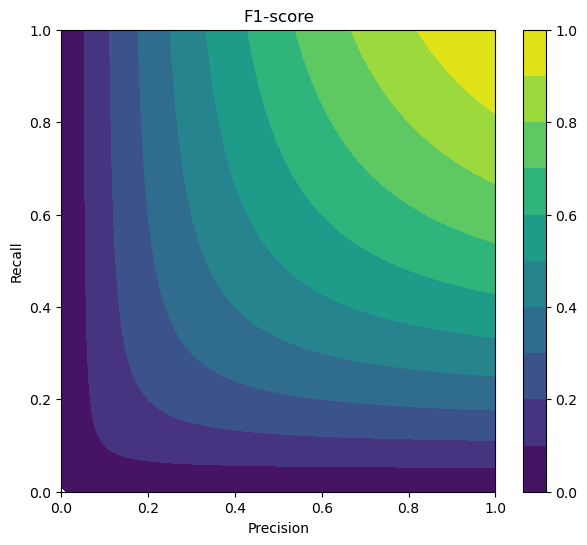

In [71]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import ticker

x = np.linspace(0, 1, 100)
y = np.linspace(0, 1, 100)

X, Y = np.meshgrid(x, y)
z = 2*X*Y/(X+Y)

fig, ax = plt.subplots(figsize=(7,6))
cs = ax.contourf(X, Y, z, locator=ticker.LinearLocator())
cbar = fig.colorbar(cs)
plt.xlabel('Precision')
plt.ylabel('Recall')
plt.title('F1-score');

## Нормализация

In [114]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [115]:
scaler = StandardScaler()

In [116]:
scaler.fit_transform(x_train)

array([[-0.88697085,  0.4037797 ,  1.12362248, ..., -0.73169924,
        -0.02897435, -0.81954393],
       [-0.93494042,  0.80894716,  0.75502011, ...,  0.80315257,
        -0.02897435, -0.81954393],
       [ 0.02445086, -0.81172266, -0.4150388 , ...,  0.80315257,
        -0.02897435, -0.81954393],
       ...,
       [ 0.60008563,  1.61928207, -1.95370008, ...,  0.80315257,
        -0.02897435,  1.22019084],
       [ 0.98384215, -1.01430639, -0.89185471, ...,  2.33800439,
        -0.02897435,  1.22019084],
       [ 0.69602476, -0.20397148, -0.98992323, ..., -0.73169924,
        -0.02897435,  1.22019084]])

## Дисбаланс

Посмотрим на объемы данных в наших классах. Напишите код. чтобы сравнить их размеры:

In [78]:
# Ваш код
...

Upsampling and Downsampling

Синтез

## Дерево решений

In [82]:
from sklearn.tree import DecisionTreeClassifier

In [108]:
clf = DecisionTreeClassifier(random_state=42)

In [109]:
clf.fit(x_train, y_train)

DecisionTreeClassifier(random_state=42)

In [110]:
pred = clf.predict(x_test)

In [111]:
accuracy_score(y_test, pred)

1.0

In [112]:
from sklearn import tree

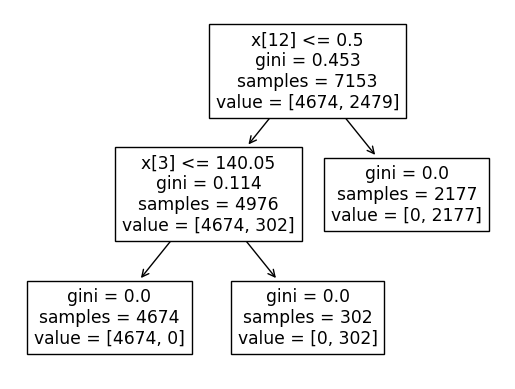

In [113]:
tree.plot_tree(clf);

## Кросс-валидация